# 퍼셉트론(perceptron)
- 신경망은 퍼셉트론 알고리즘부터 시작
- 퍼셉트론 알고리즘 : 여러 개의 신호를 입력으로 받아 하나의 신호를 출력하는 알고리즘

### 퍼셉트론 개념
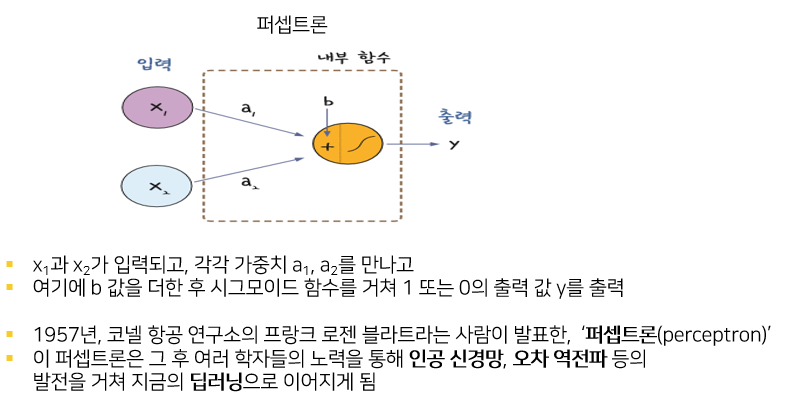

- 활성화함수(a1x1 + a2x2 + b) --> 0 or 1
- 활성화함수(a1x1 + a2x2 + b) 값이 임계값(threshold)과 비교하여 크면 1, 그렇지 않으면 0

### 뉴런과 퍼셉트론의 비교

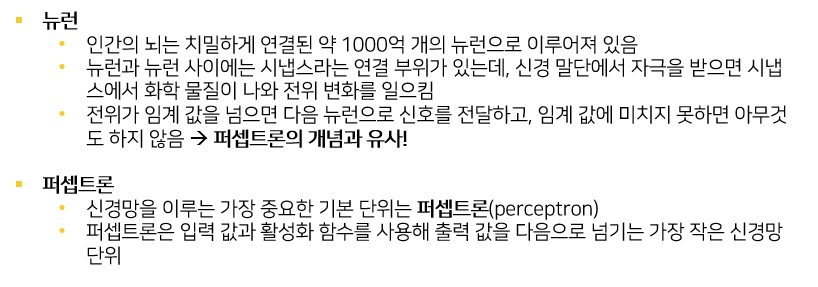

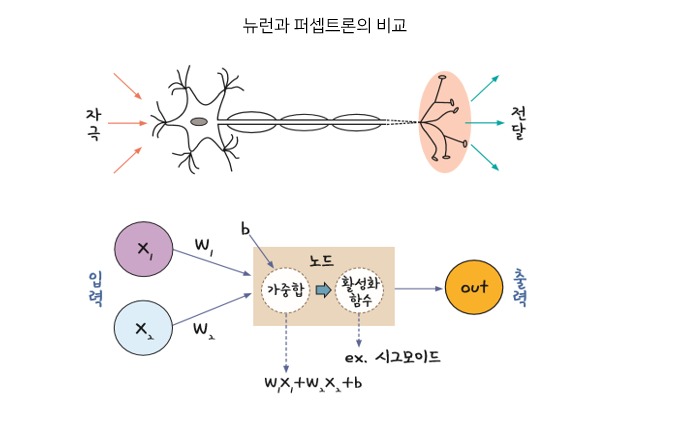

### 가중치, 가중합, 바이어스, 활성화 함수

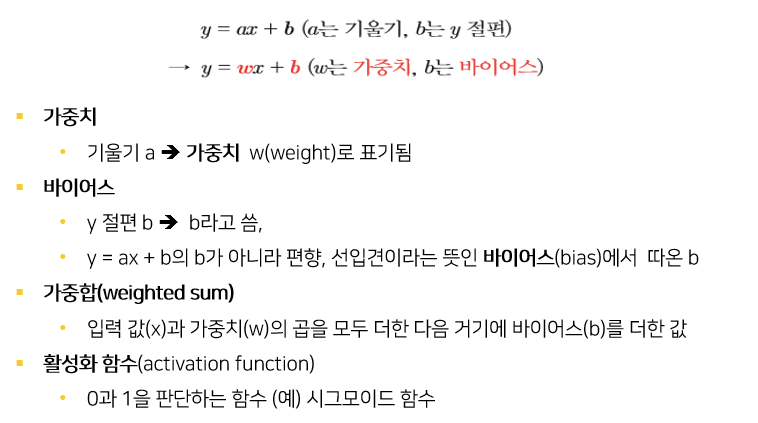

### 퍼셉트론의 한계

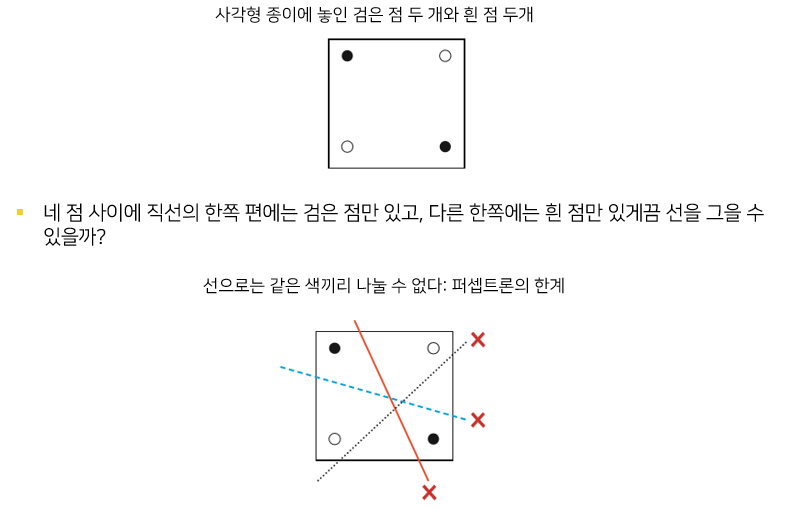

### XOR 문제

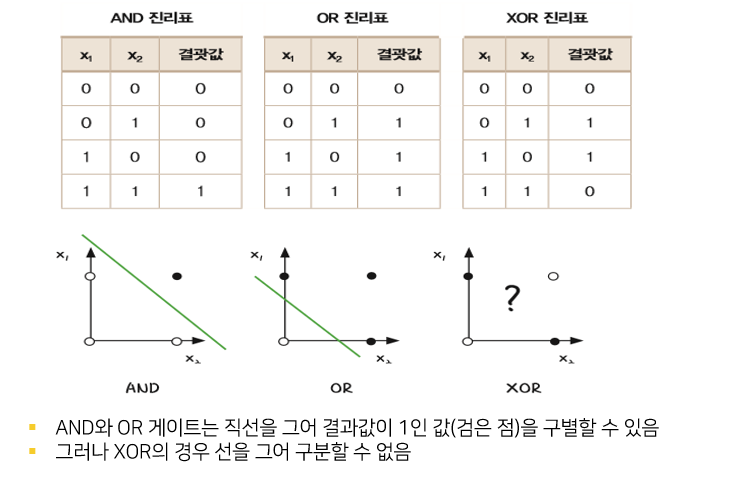

### 다층 퍼셉트론

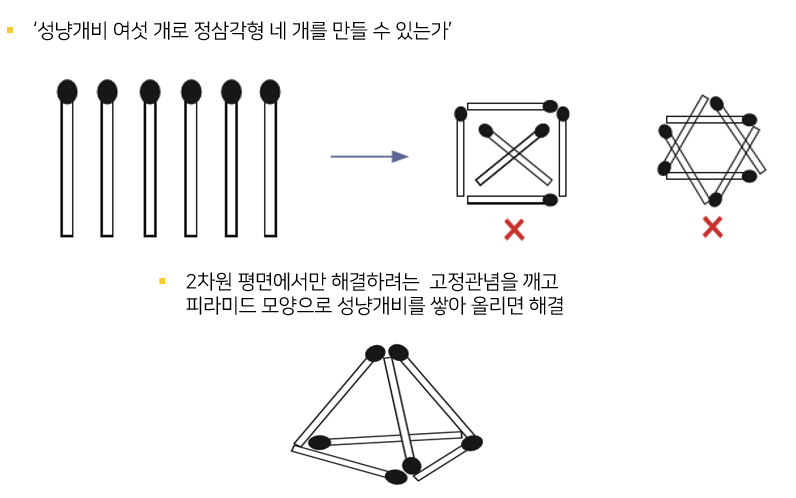

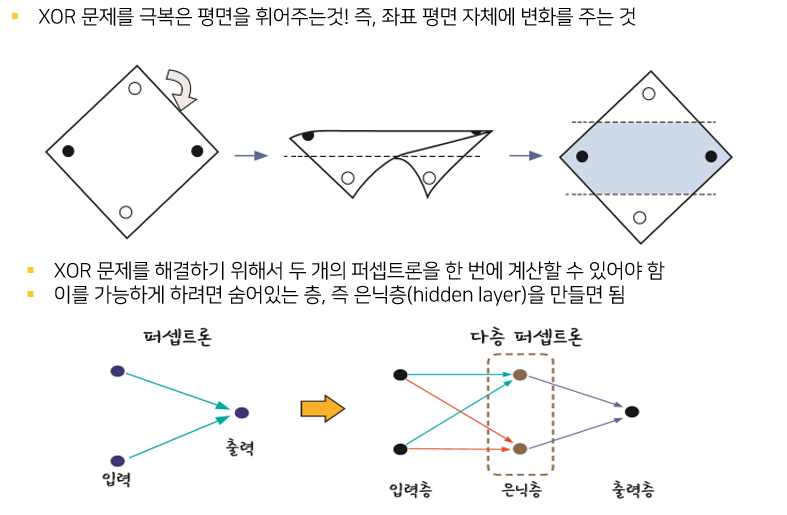

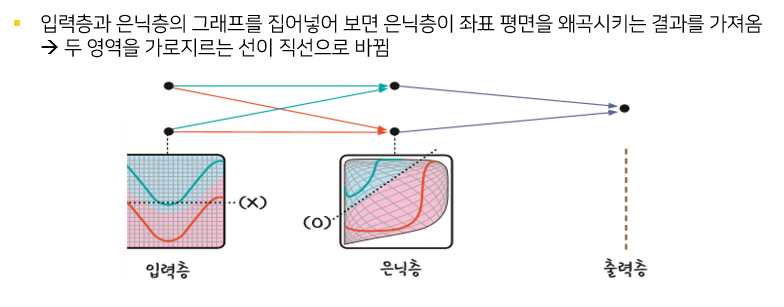

### 다중 퍼셉트론의 설계

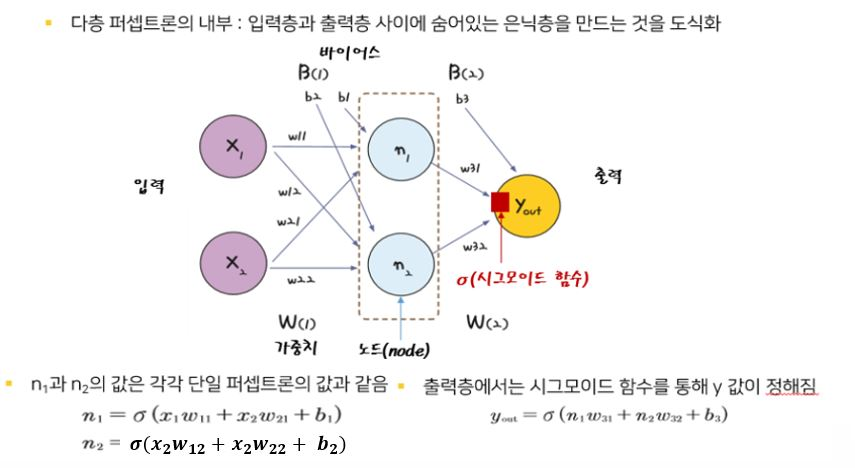

### 다중 퍼셉트론를 이용한 XOR 문제 해결

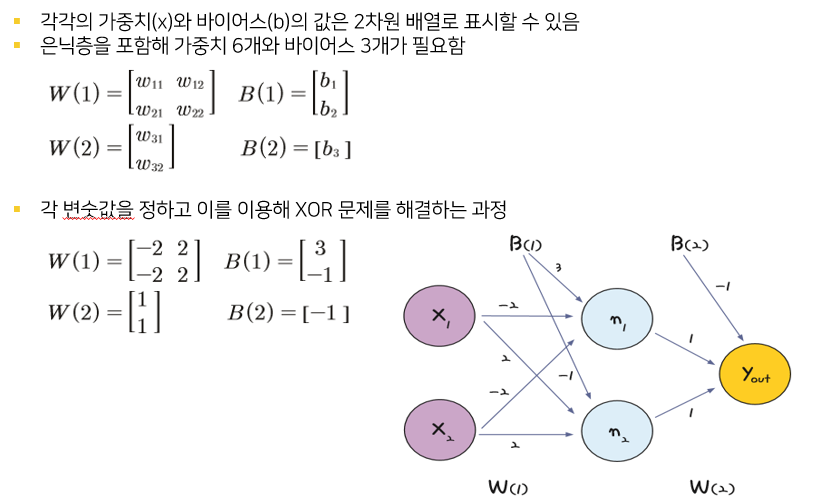

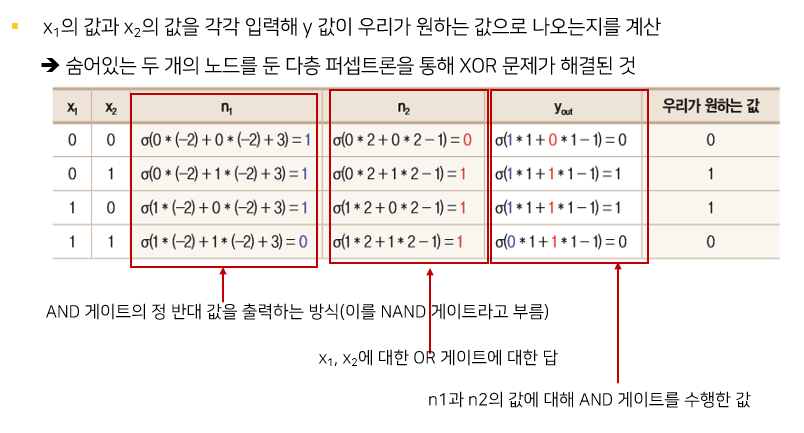

### XOR 문제 해결하기 실습

In [1]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))


# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(x[0], x[1])
        print("입력 값: " + str(x) + " 출력 값: " + str(y))
        

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


### 케라스의 다층퍼셉트론을 이용한 XOR 구현하기

In [7]:
,# 모듈 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse
import numpy as np

# 시드 설정
tf.random.set_seed(42)

# 1) 데이타 준비하기
data = np.array([[0,0], [0,1],[1,0], [1,1]])
label = np.array([[0], [1], [1], [0]])

# 2) 모델 구성하기
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 3) 컴파일 - 옵티마이저, 로스함수, 평가지표
model.compile(optimizer= RMSprop(), loss=mse, metrics=['acc'])

# 4) 학습 시키기 - fit()
model.fit(data, label, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 654ms/step - loss: 0.2424 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2408 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2396 - acc: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2386 - acc: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2377 - acc: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2370 - acc: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2364 - acc: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2358 - acc: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2352 - acc: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2347 - acc: 0.7500
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.234

In [11]:
# 5) 모델 평가하기
model.evaluate(data, label)

1/1 [==============================] - 0s 104ms/step - loss: 0.1980 - acc: 1.0000


[0.19798868894577026, 1.0]

In [10]:
# 6) 예측하기
model.predict([[1,0]])

array([[0.5649981]], dtype=float32)

### 오차 역전파
- 역전파(Backward Pass)
  - 주어진 문제를 해결하기 위해 구성한 모델에서 수많은 가중치를 무작위로 설정한 뒤 결과값을 도출하고, 이를 정답과 비교하여 가중치를 다시 조정하는 과정에서 사용하는 알고리즘
- 순전파(Forword Pass)

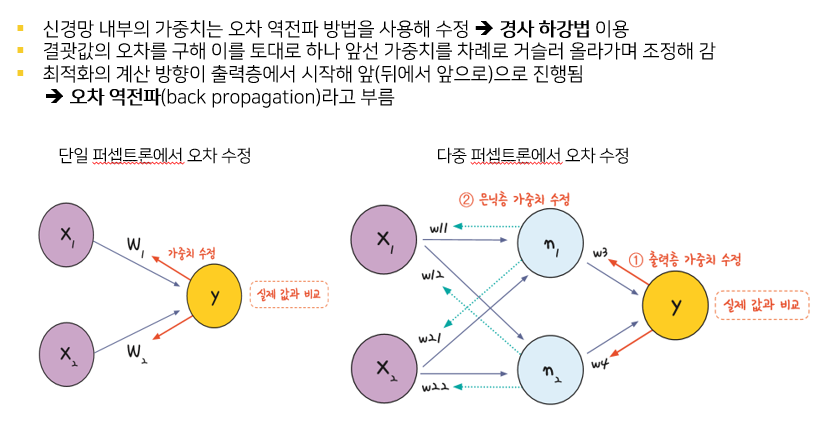

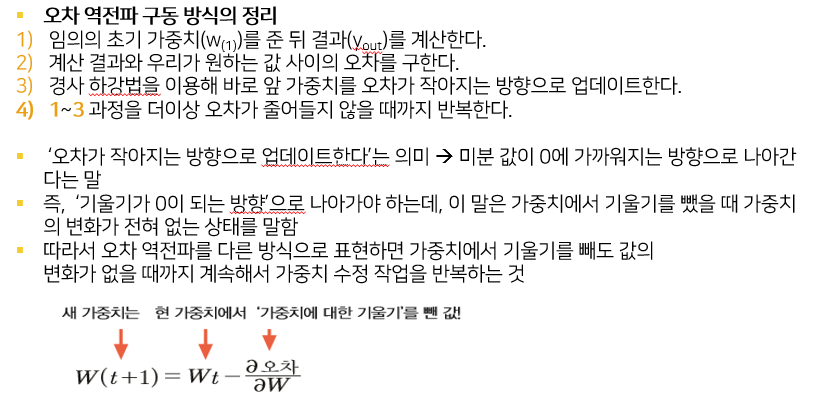

### 경사 하강법
- 신경망은 가중치를 업데이트 하면서 주어진 문제를 최적화
- 가중치를 업데이트 하는 방법의 대표적인 방법이 경사 하강법(Gradient Desent)
- 경사 하강법
  - 특정 함수에서 미분을 통해 얻은 기울기를 이용하여 최적의 값을 찾아가는(손실을 줄이는) 방법

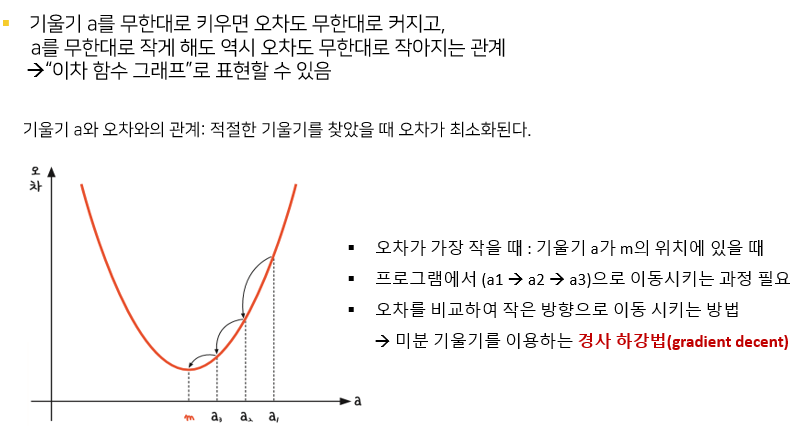

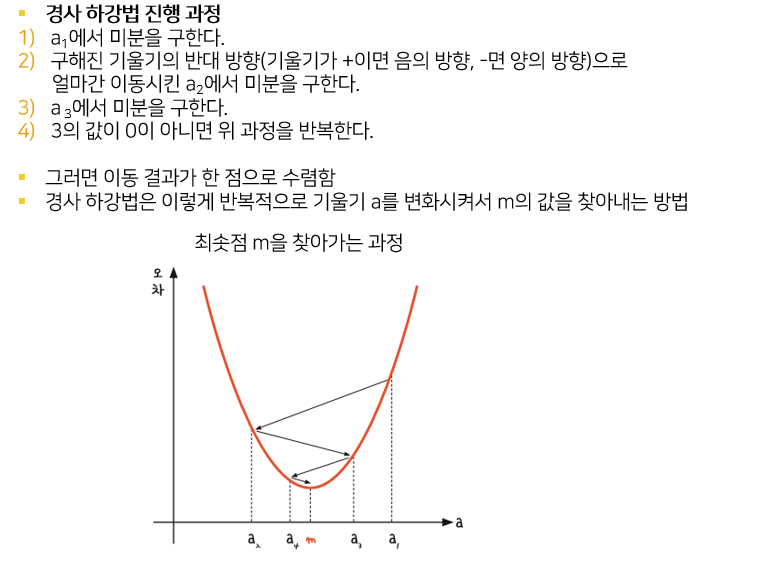

### 학습률
- 모델의 학습에서 학습 속도나 성능에 큰 영향을 미치는 중요한 하이퍼파라미터


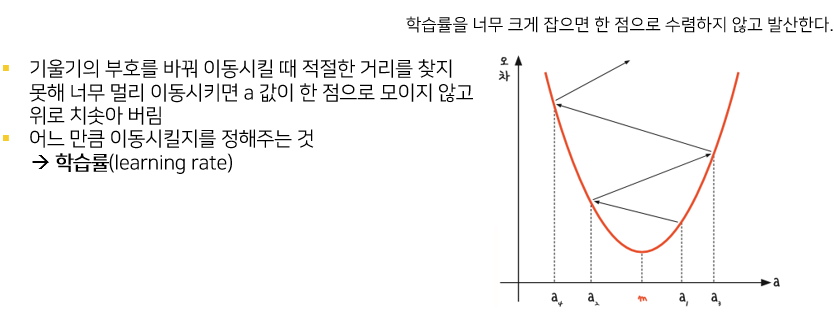

### 오차 역전파 실습

In [ ]:
import random
import numpy as np

random.seed(777)

# 환경 변수 지정

# 입력값 및 타겟값
data = [
    [[0, 0], [0]],
    [[0, 1], [1]],
    [[1, 0], [1]],
    [[1, 1], [0]]
]

# 실행 횟수(iterations), 학습률(lr), 모멘텀 계수(mo) 설정
iterations=5000
lr=0.1
mo=0.4

# 활성화 함수 - (1) 시그모이드
# 미분할 때와 아닐 때의 각각의 값
def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

# 활성화 함수 - (2) tanh(하이퍼볼릭 탄젠트 함수)
# tanh 함수의 미분은 1 - (활성화 함수 출력의 제곱)
def tanh(x, derivative=False):
    if (derivative == True):
        return 1 - x ** 2
    return np.tanh(x)

# 가중치 배열 만드는 함수
def makeMatrix(i, j, fill=0.0):
    mat = []
    for i in range(i):
        mat.append([fill] * j)
    return mat

# 신경망의 실행
class NeuralNetwork:

    # 초깃값의 지정
    def __init__(self, num_x, num_yh, num_yo, bias=1):

        # 입력값(num_x), 은닉층 초깃값(num_yh), 출력층 초깃값(num_yo), 바이어스
        self.num_x = num_x + bias  # 바이어스는 1로 지정
        self.num_yh = num_yh
        self.num_yo = num_yo

        # 활성화 함수 초깃값
        self.activation_input = [1.0] * self.num_x
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo

        # 가중치 입력 초깃값
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()

        # 가중치 출력 초깃값
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()

        # 모멘텀 SGD를 위한 이전 가중치 초깃값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo)

    # 업데이트 함수
    def update(self, inputs):

        # 입력 레이어의 활성화 함수
        for i in range(self.num_x - 1):
            self.activation_input[i] = inputs[i]

        # 은닉층의 활성화 함수
        for j in range(self.num_yh):
            sum = 0.0
            for i in range(self.num_x):
                sum = sum + self.activation_input[i] * self.weight_in[i][j]
            # 시그모이드와 tanh 중에서 활성화 함수 선택
            self.activation_hidden[j] = tanh(sum, False)

        # 출력층의 활성화 함수
        for k in range(self.num_yo):
            sum = 0.0
            for j in range(self.num_yh):
                sum = sum + self.activation_hidden[j] * self.weight_out[j][k]
            # 시그모이드와 tanh 중에서 활성화 함수 선택
            self.activation_out[k] = tanh(sum, False)

        return self.activation_out[:]
    
    # 역전파의 실행
    def backPropagate(self, targets):

        # 델타 출력 계산
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k]
            # 시그모이드와 tanh 중에서 활성화 함수 선택, 미분 적용
            output_deltas[k] = tanh(self.activation_out[k], True) * error

        # 은닉 노드의 오차 함수
        hidden_deltas = [0.0] * self.num_yh
        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                error = error + output_deltas[k] * self.weight_out[j][k]
                # 시그모이드와 tanh 중에서 활성화 함수 선택, 미분 적용
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error

        # 출력 가중치 업데이트
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                gradient = output_deltas[k] * self.activation_hidden[j]
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                self.gradient_out[j][k] = gradient

        # 입력 가중치 업데이트
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo*self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient

        # 오차의 계산(최소 제곱법)
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k]) ** 2
        return error

    # 학습 실행
    def train(self, patterns):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets)
            if i % 500 == 0:
                print('error: %-.5f' % error)

    # 결괏값 출력
    def result(self, patterns):
        for p in patterns:
            print('Input: %s, Predict: %s' % (p[0], self.update(p[0])))

if __name__ == '__main__':

    # 두 개의 입력 값, 두 개의 레이어, 하나의 출력 값을 갖도록 설정
    n = NeuralNetwork(2, 2, 1)

    # 학습 실행
    n.train(data)

    # 결괏값 출력
    n.result(data)

# Reference: http://arctrix.com/nas/python/bpnn.py (Neil Schemenauer)

error: 0.66537
error: 0.00263
error: 0.00088
error: 0.00051
error: 0.00036
error: 0.00027
error: 0.00022
error: 0.00018
error: 0.00016
error: 0.00014
Input: [0, 0], Predict: [0.0006183430577839138]
Input: [0, 1], Predict: [0.9889696478602483]
Input: [1, 0], Predict: [0.9889970505963888]
Input: [1, 1], Predict: [0.0021449252379751507]


### 신경망의 구현 과정

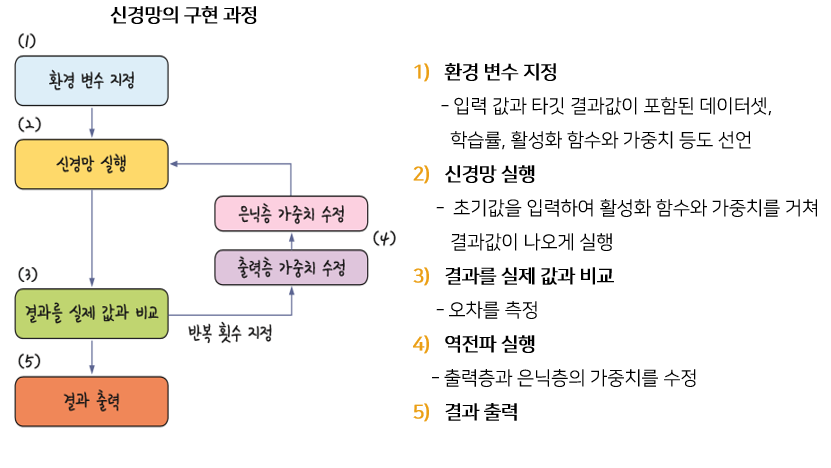

### 신경망에서 딥러닝으로

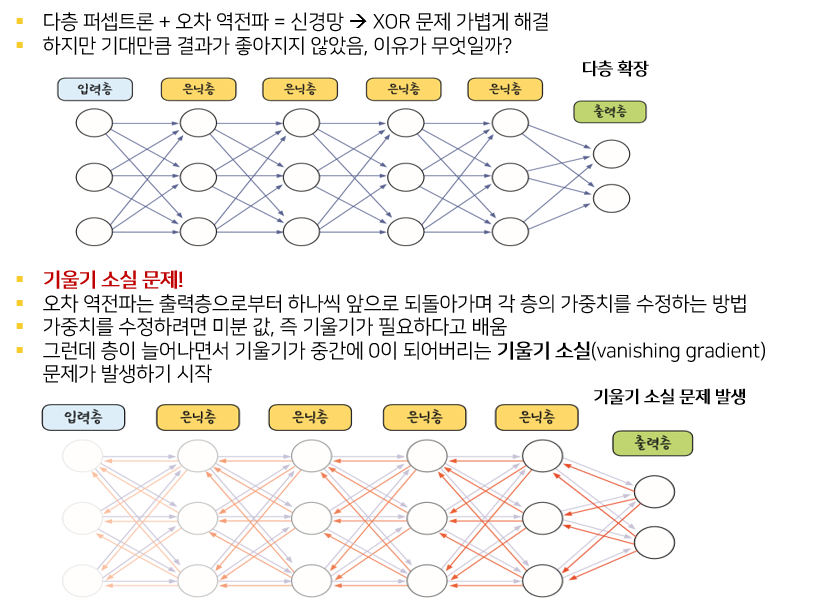

### 기울기 소실 문제

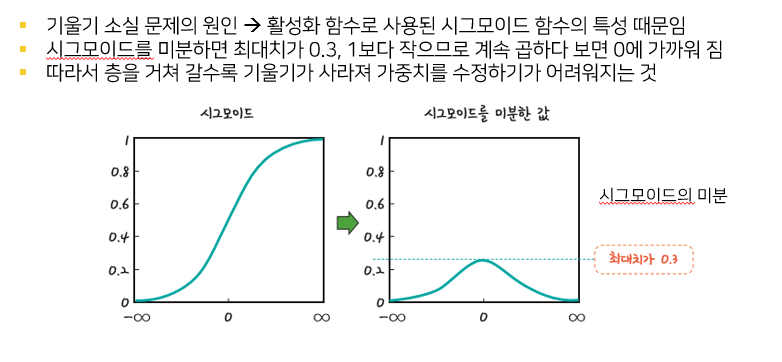

### 시그모이드를 다양한 활성화 함수로 대체

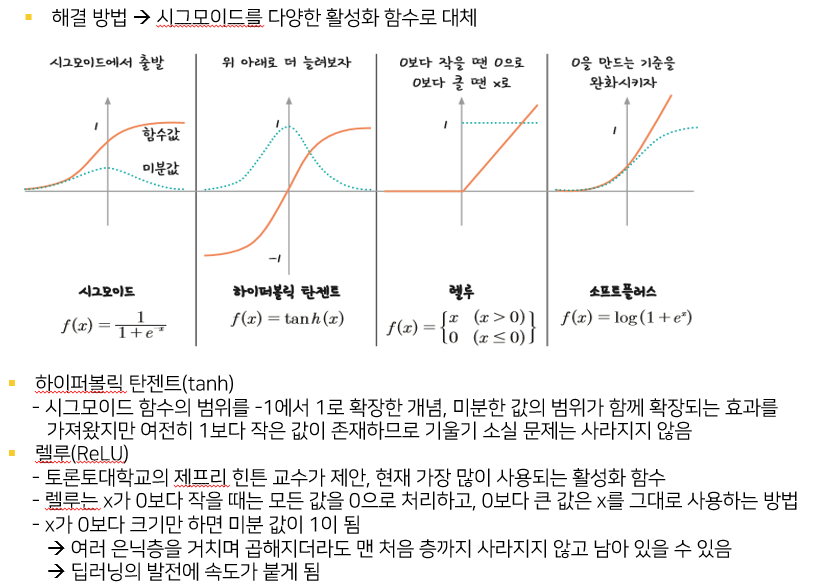

### 속도와 정확도 문제를 해결하는 고급 경사 하강법

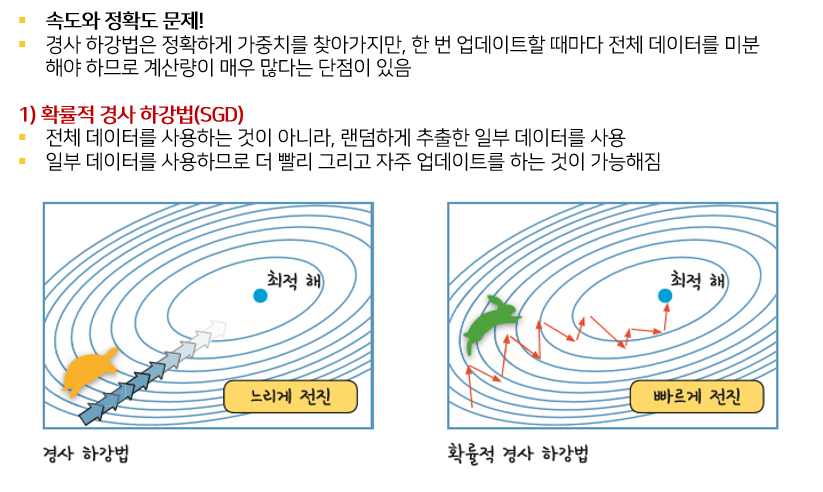

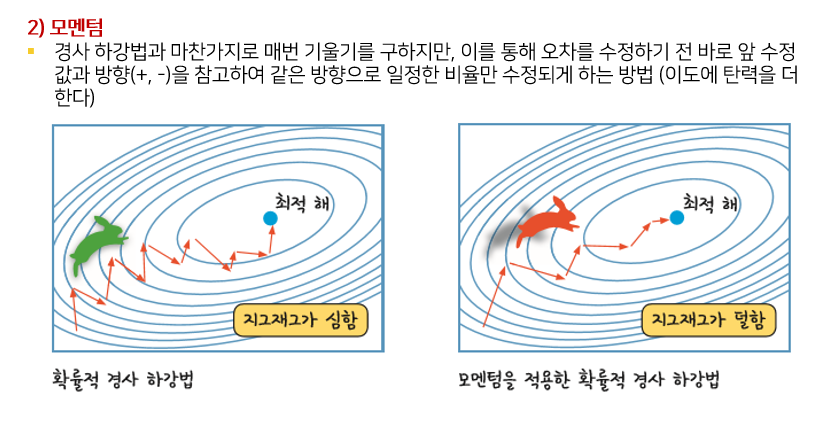

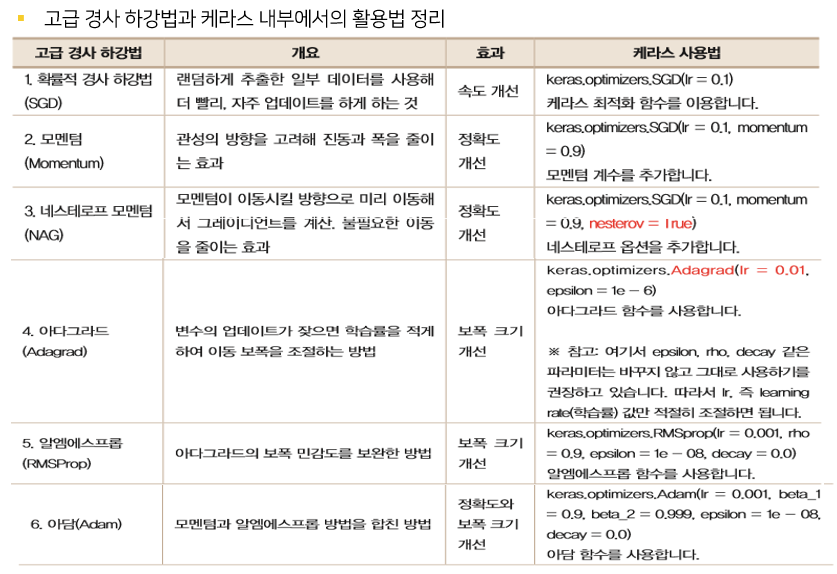

### 활성화 함수의 종류

### 소프트맥스(softmax) 함수
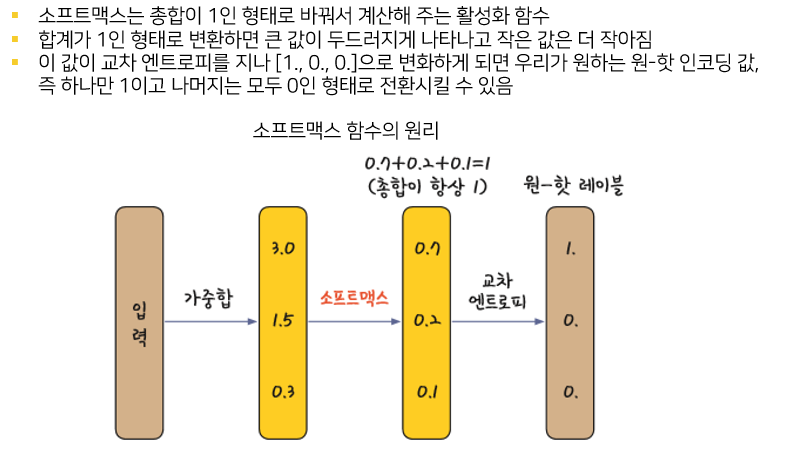

### 과적합(over fitting)

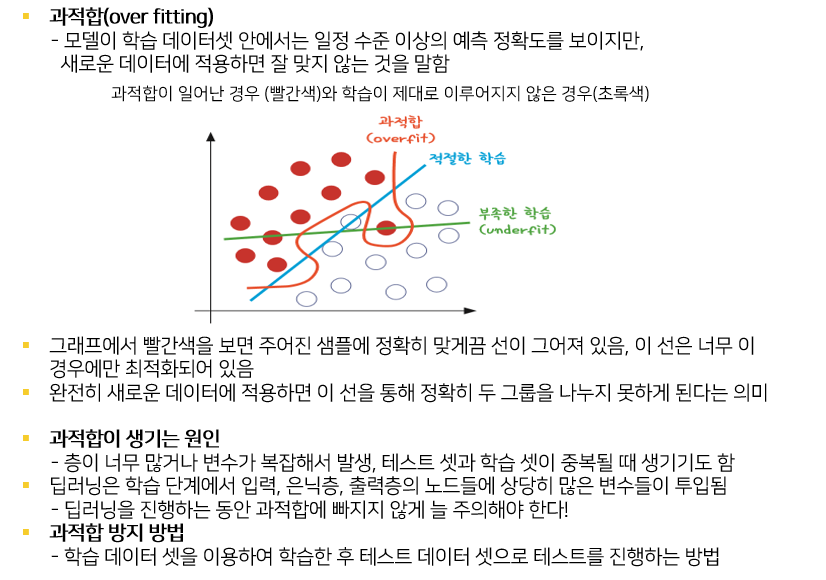



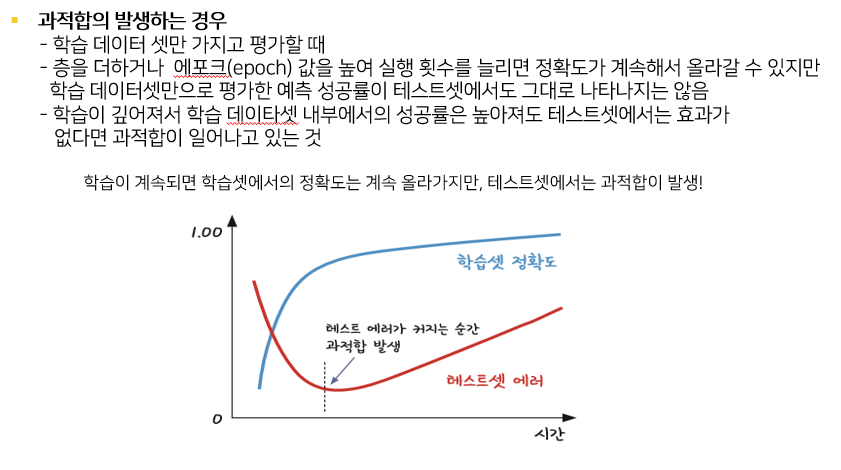

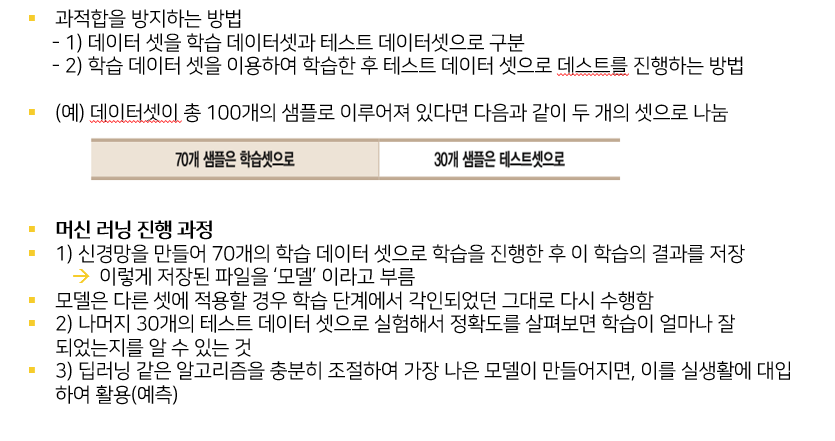

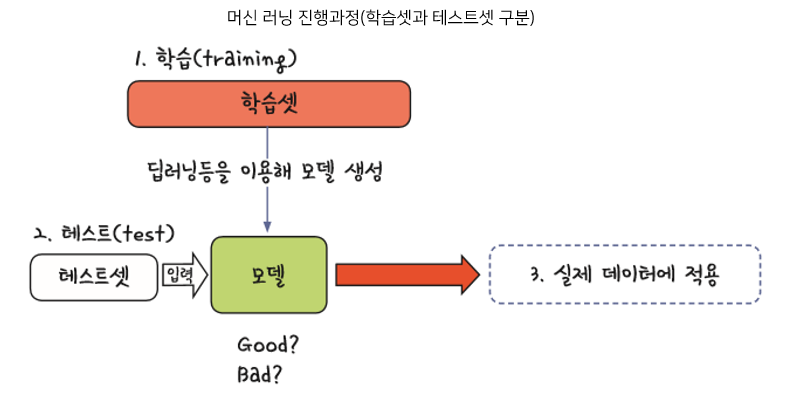

### 교차 검증

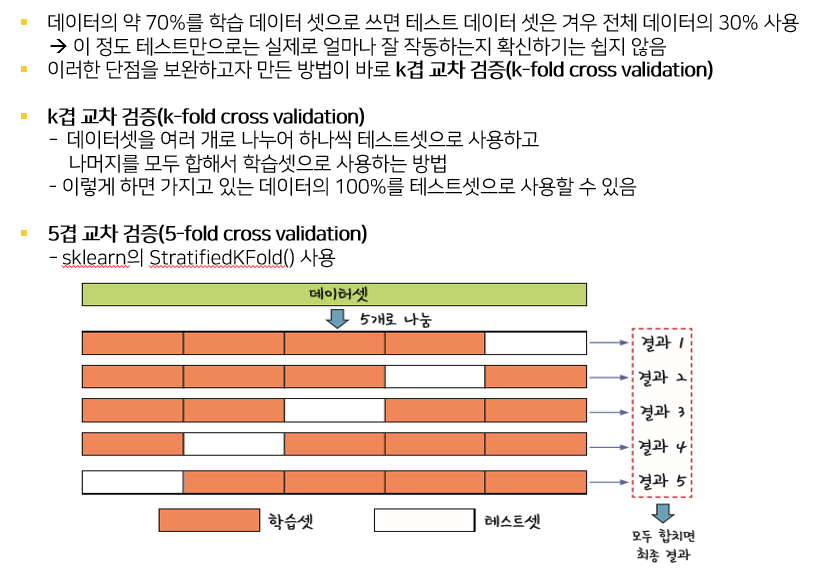